In [36]:
import pandas as pd
import ast

# Function to read and clean the .txt file
def read_and_clean_txt(file_path):
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Parse the lines to create a list of lists
    data = [ast.literal_eval(line.strip()) for line in lines]
    
    # Define column names
    column_names = ['Precision4genCQ', 'Recall4genCQ', 'Precision4expertCQ', 'Recall4expertCQ']

    # Convert the list of lists to a DataFrame
    df = pd.DataFrame(data, columns=column_names)
    
    return df

temp = [0.5, 0.75, 1.0, 1.25, 1.5]
rag_file_count = [0,1,2,3,4,5]
Precision_set = [] #[P_temp1, P_temp2,...P_temp5]
for i_temp in temp:
    P_temp = []
    for i_count in rag_file_count:
        # for each temp
        file = f'metric_results/rag-file-count-{i_count}-gpt-4o-temp-{i_temp}.txt'
        df = read_and_clean_txt(file)
        averages = df.mean()
        # get average precision for each temperature
        P_temp.append(averages[0])
    Precision_set.append(P_temp)

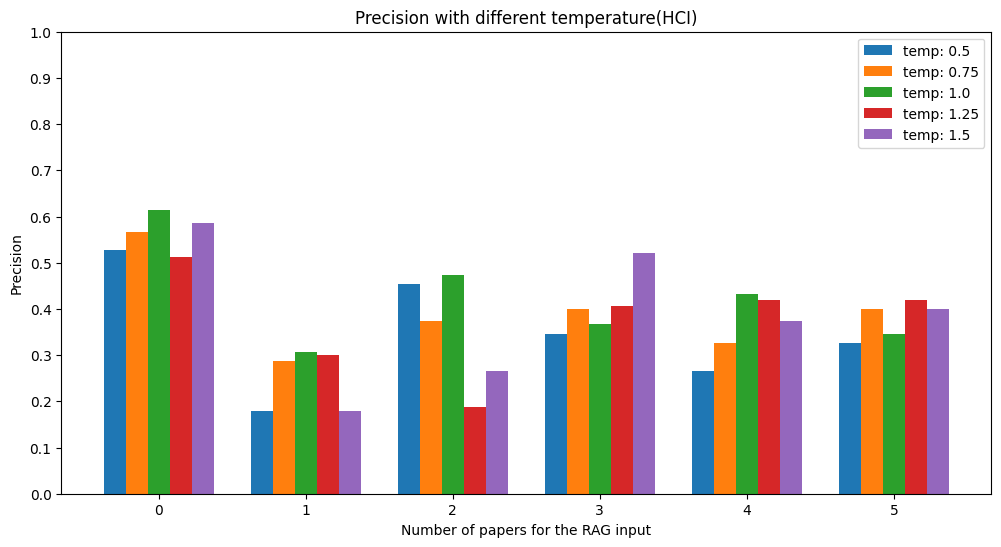

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: precision metrics for 6 years, five sets
years = ['0', '1', '2', '3', '4', '5']
precision_set1 = Precision_set[0]
precision_set2 = Precision_set[1]
precision_set3 = Precision_set[2]
precision_set4 = Precision_set[3]
precision_set5 = Precision_set[4]

# Number of years
n = len(years)

# The x locations for the groups
ind = np.arange(n)

# The width of the bars
width = 0.15

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting precision bars for all sets
rects1 = ax.bar(ind - 2*width, precision_set1, width, label='temp: 0.5')
rects2 = ax.bar(ind - width, precision_set2, width, label='temp: 0.75')
rects3 = ax.bar(ind, precision_set3, width, label='temp: 1.0')
rects4 = ax.bar(ind + width, precision_set4, width, label='temp: 1.25')
rects5 = ax.bar(ind + 2*width, precision_set5, width, label='temp: 1.5')

# Adding title and labels
ax.set_title('Precision with different temperature(HCI)')
ax.set_xlabel('Number of papers for the RAG input')
ax.set_ylabel('Precision')
ax.set_xticks(ind)
ax.set_xticklabels(years)

# Adding legend
ax.legend()

# Adding y-axis labels
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))

# Save the figure as PNG
plt.savefig('precision_HCI.png', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


In [43]:
import pandas as pd
import ast

# Function to read and clean the .txt file
def read_and_clean_txt(file_path):
    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Parse the lines to create a list of lists
    data = [ast.literal_eval(line.strip()) for line in lines]
    
    # Define column names
    column_names = ['Precision4genCQ', 'Recall4genCQ', 'Precision4expertCQ', 'Recall4expertCQ']

    # Convert the list of lists to a DataFrame
    df = pd.DataFrame(data, columns=column_names)
    
    return df

temp = [0.5, 0.75, 1.0, 1.25, 1.5]
rag_file_count = [0,1,2,3,4,5]
recall_set = [] #[R_temp1, R_temp2,...R_temp5]
for i_temp in temp:
    R_temp = []
    for i_count in rag_file_count:
        # for each temp
        file = f'metric_results/rag-file-count-{i_count}-gpt-4o-temp-{i_temp}.txt'
        df = read_and_clean_txt(file)
        averages = df.mean()
        # get average recall for each temperature
        R_temp.append(averages[1])
    recall_set.append(R_temp)

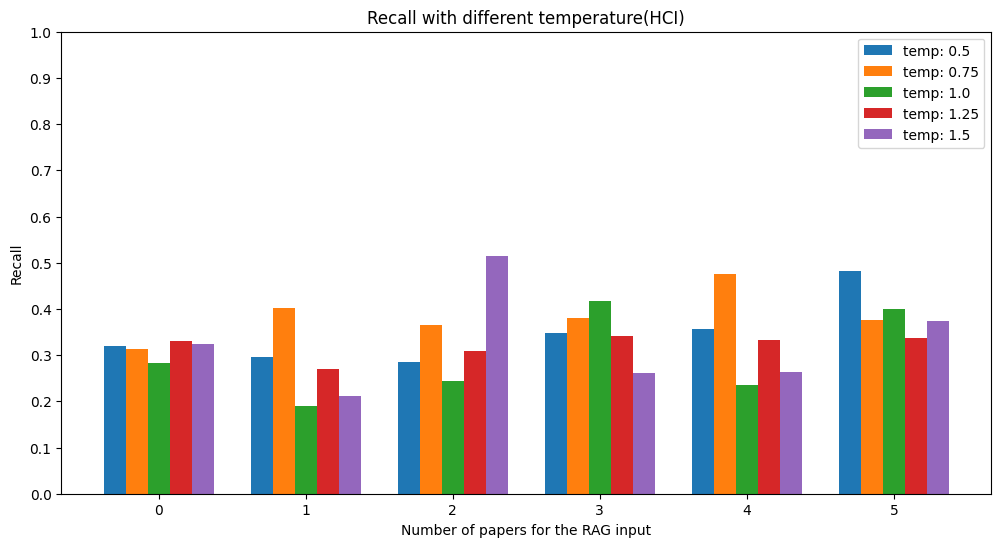

In [44]:
import matplotlib.pyplot as plt
import numpy as np

counts = ['0', '1', '2', '3', '4', '5']
recall_set1 = recall_set[0]
recall_set2 = recall_set[1]
recall_set3 = recall_set[2]
recall_set4 = recall_set[3]
recall_set5 = recall_set[4]

n = len(counts)

# The x locations for the groups
ind = np.arange(n)

# The width of the bars
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(ind - 2*width, recall_set1, width, label='temp: 0.5')
rects2 = ax.bar(ind - width, recall_set2, width, label='temp: 0.75')
rects3 = ax.bar(ind, recall_set3, width, label='temp: 1.0')
rects4 = ax.bar(ind + width, recall_set4, width, label='temp: 1.25')
rects5 = ax.bar(ind + 2*width, recall_set5, width, label='temp: 1.5')

# Adding title and labels
ax.set_title('Recall with different temperature(HCI)')
ax.set_xlabel('Number of papers for the RAG input')
ax.set_ylabel('Recall')
ax.set_xticks(ind)
ax.set_xticklabels(counts)

# Adding legend
ax.legend()

# Adding y-axis labels
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.1))

# Save the figure as PNG
plt.savefig('recall_HCI.png', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()
